<a href="https://colab.research.google.com/github/sanketdholi33/Data-science-assignment/blob/main/EastwestAirlines(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib','inline')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

In [ ]:
#Import Dataset
airline=pd.read_csv('EastWestAirlines.csv')
airline

In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [14]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [16]:
#Normalize heterogenous numerical data
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


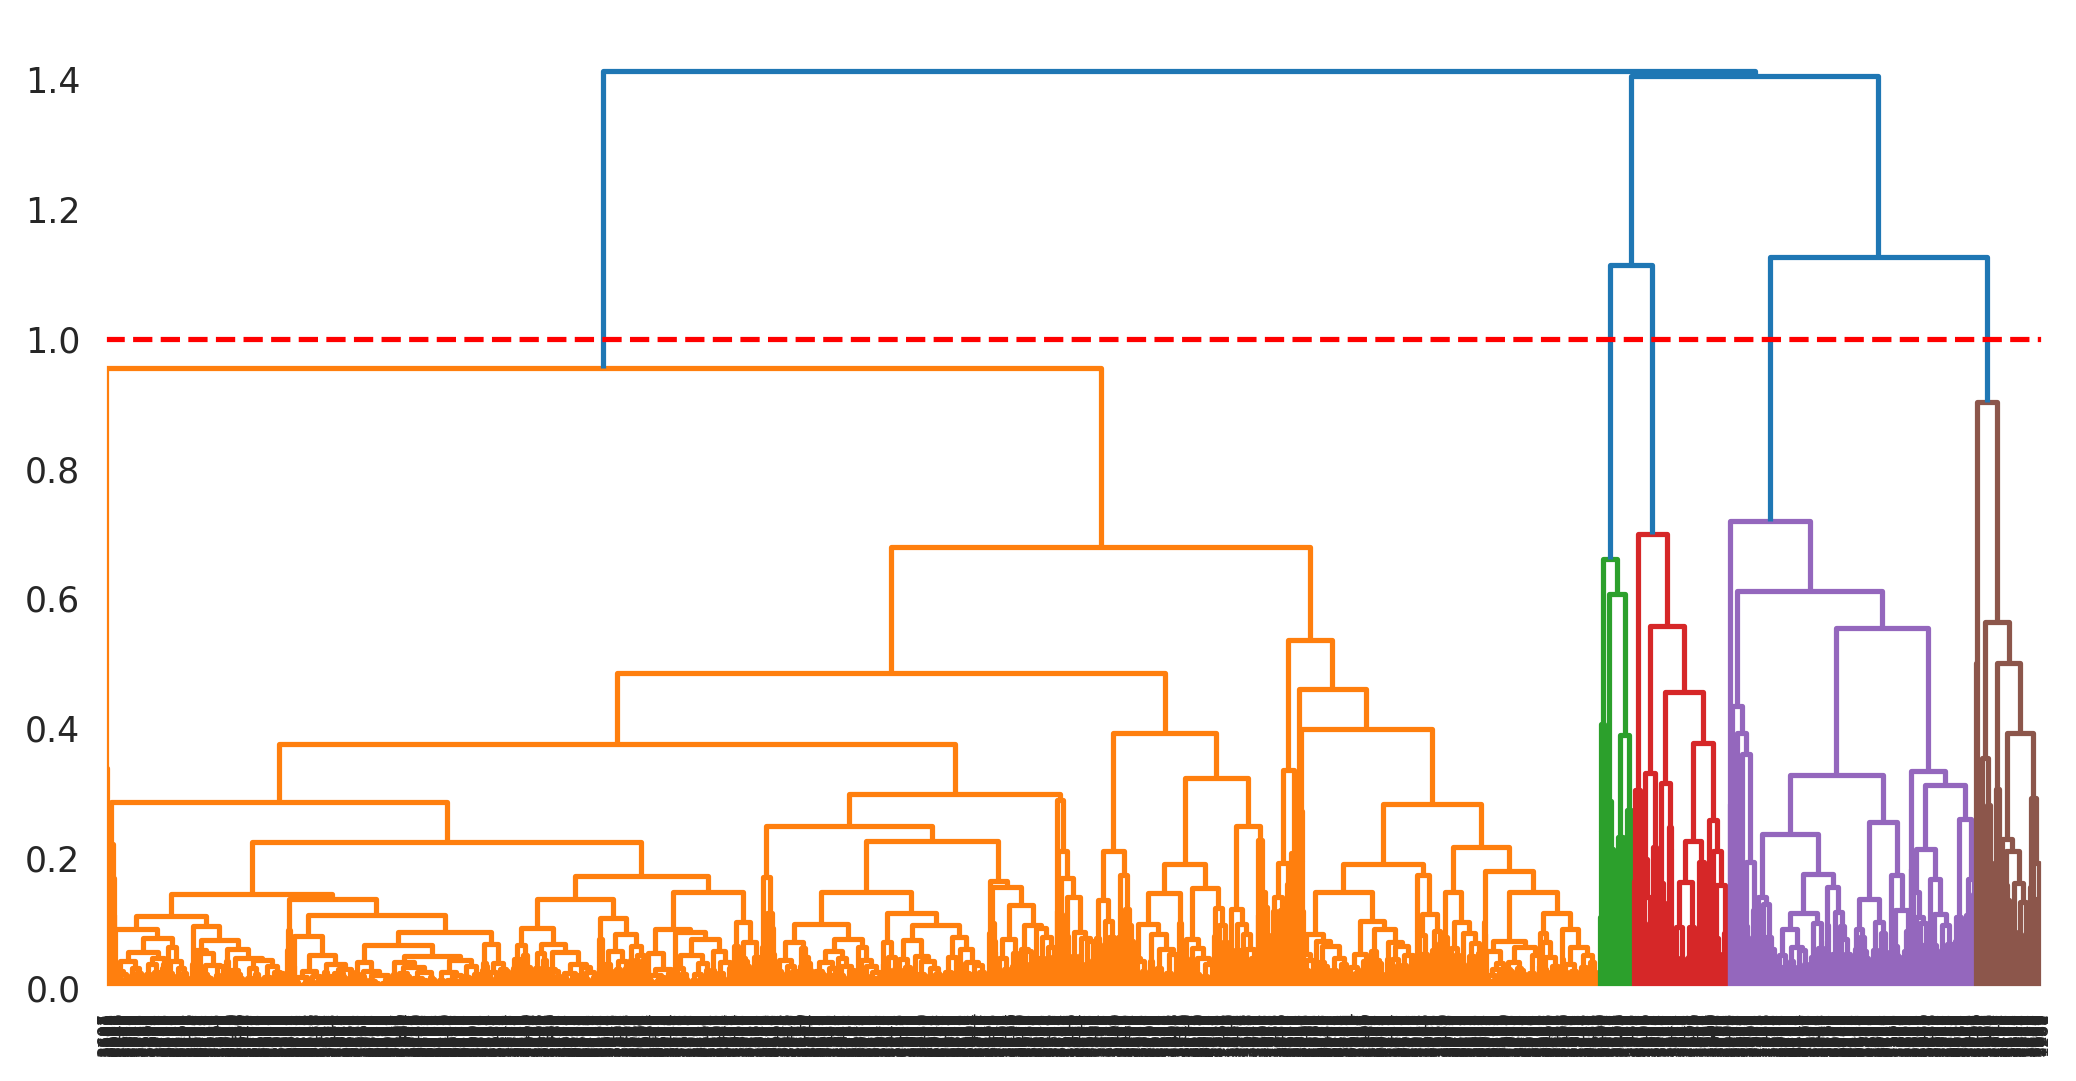

In [18]:
#Create Dendrograms
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete'))
plt.axhline(y = 1,c='red',linestyle = '--')

In [22]:
unique_colors=set(dendograms['color_list'])

In [24]:
optimal_clusters=len(unique_colors)-1
optimal_clusters

5

In [32]:
#create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [29]:
!pip install scikit-learn

In [33]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [35]:
#Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [39]:
grouped_data=airline2.groupby('clustersid').agg(['mean']).reset_index()

grouped_data


,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


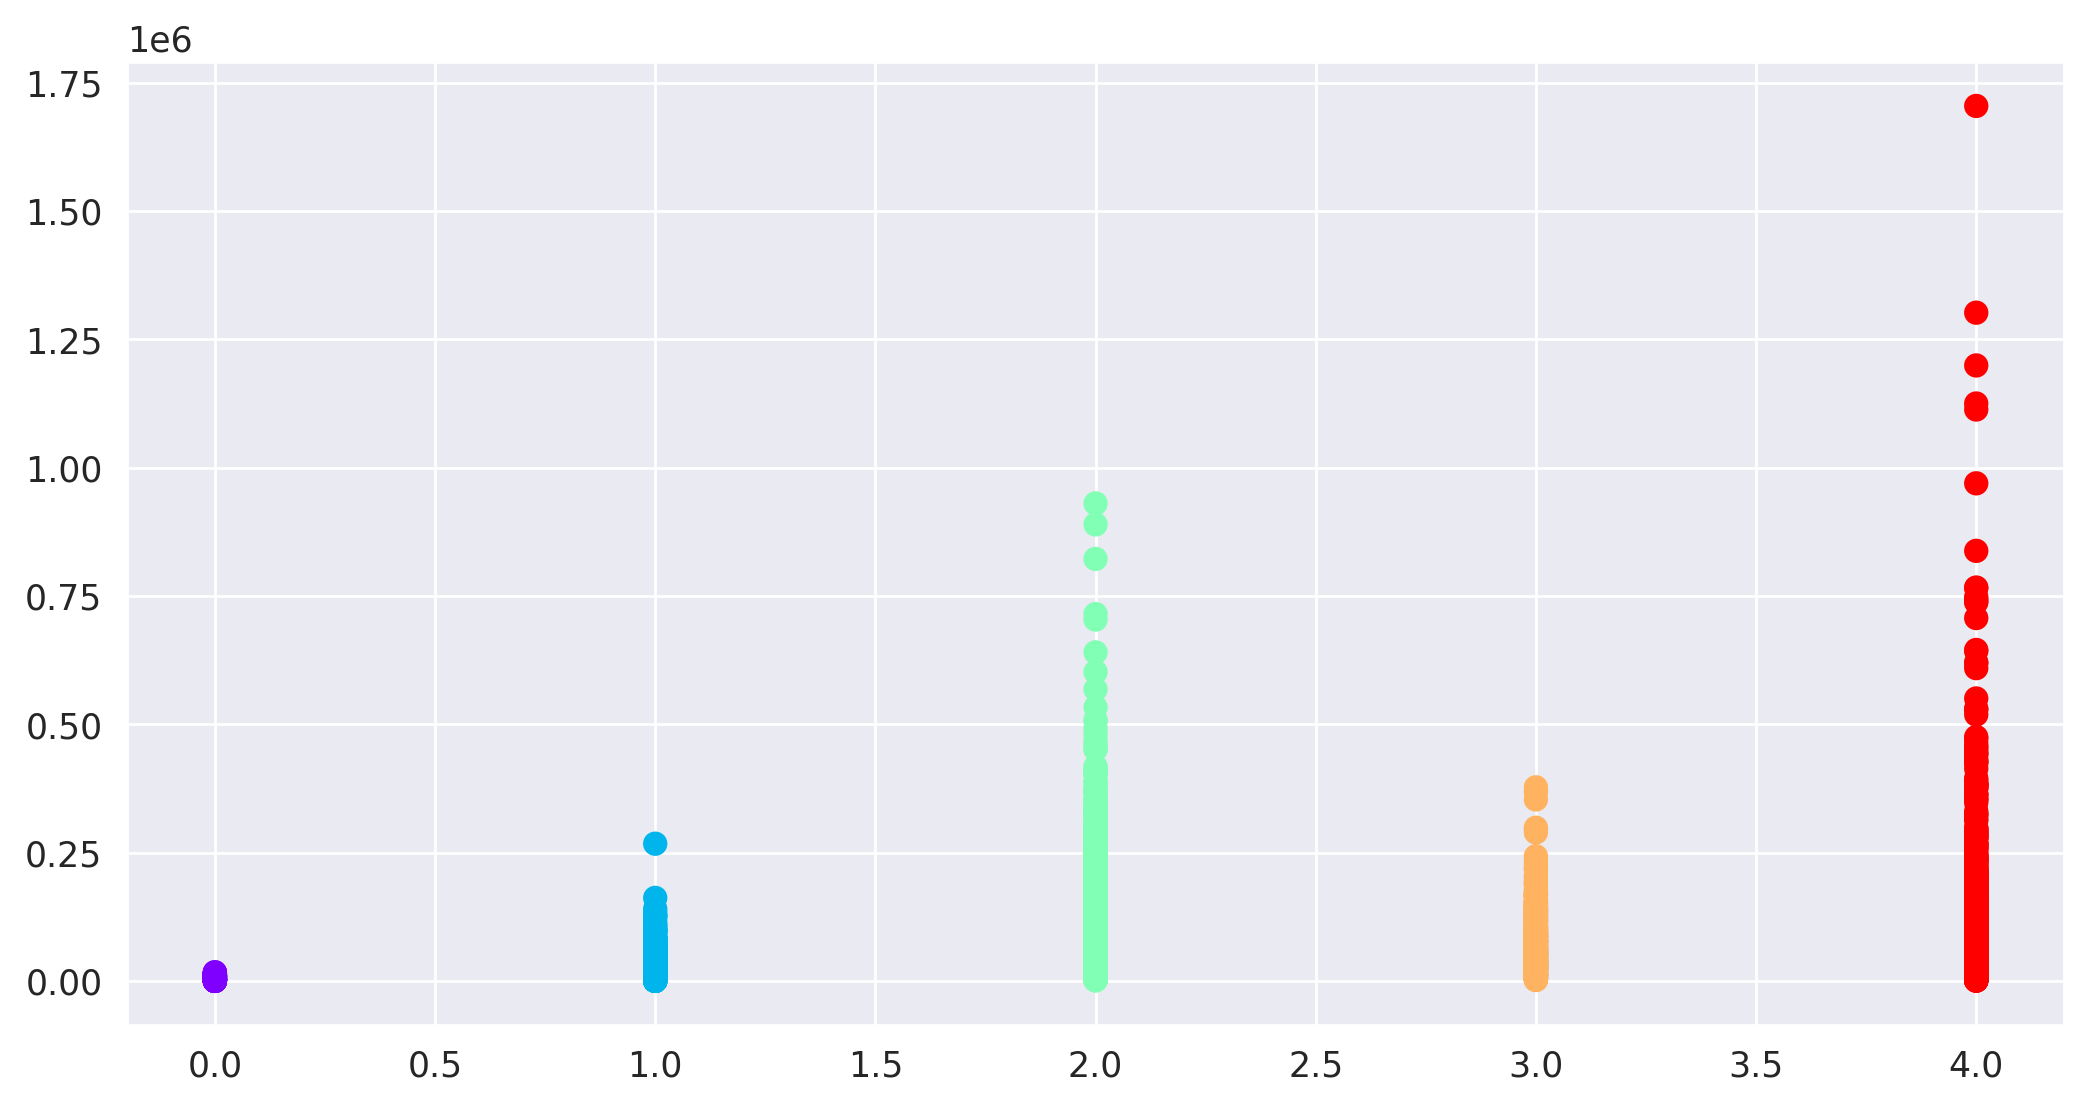

In [40]:
#Plot Clusters
plt.scatter(airline2['clustersid'],airline2['Balance'],c=hclusters.labels_,cmap='rainbow')


In [63]:
#k-means algorithm
kmeans = KMeans(n_clusters=3,init = 'k-means++',random_state=42)
k_means=kmeans.fit_predict(airline2_norm)

k_means

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [64]:
k_means1=k_means+1
k_cluster =list(k_means1)

In [65]:
kmeans_mean_cluster = pd.DataFrame(round(airline2.groupby('k_cluster').mean(),1))
kmeans_mean_cluster

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
k_cluster,,,,,,,,,,,,
1,86696.1,164.5,1.8,1.0,1.0,12337.2,10.6,469.0,1.4,4045.5,0.3,2.9
2,47062.7,111.6,3.3,1.0,1.1,39388.7,17.9,546.4,1.7,4168.7,0.7,1.9
3,5131.6,8.2,1.0,1.0,1.0,869.4,2.9,66.8,0.2,4824.3,0.2,0.1


In [66]:
kmeans_mean_cluster.index = ['Cluster{}'.format(i) for i in kmeans_mean_cluster.index]

In [67]:
pd.DataFrame(round(airline2.groupby('k_cluster').count(),1))

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
k_cluster,,,,,,,,,,,,
1,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938,2938
2,815,815,815,815,815,815,815,815,815,815,815,815
3,246,246,246,246,246,246,246,246,246,246,246,246


In [71]:
airline2['k_cluster'] = k_cluster

In [74]:
X = airline2_norm.values

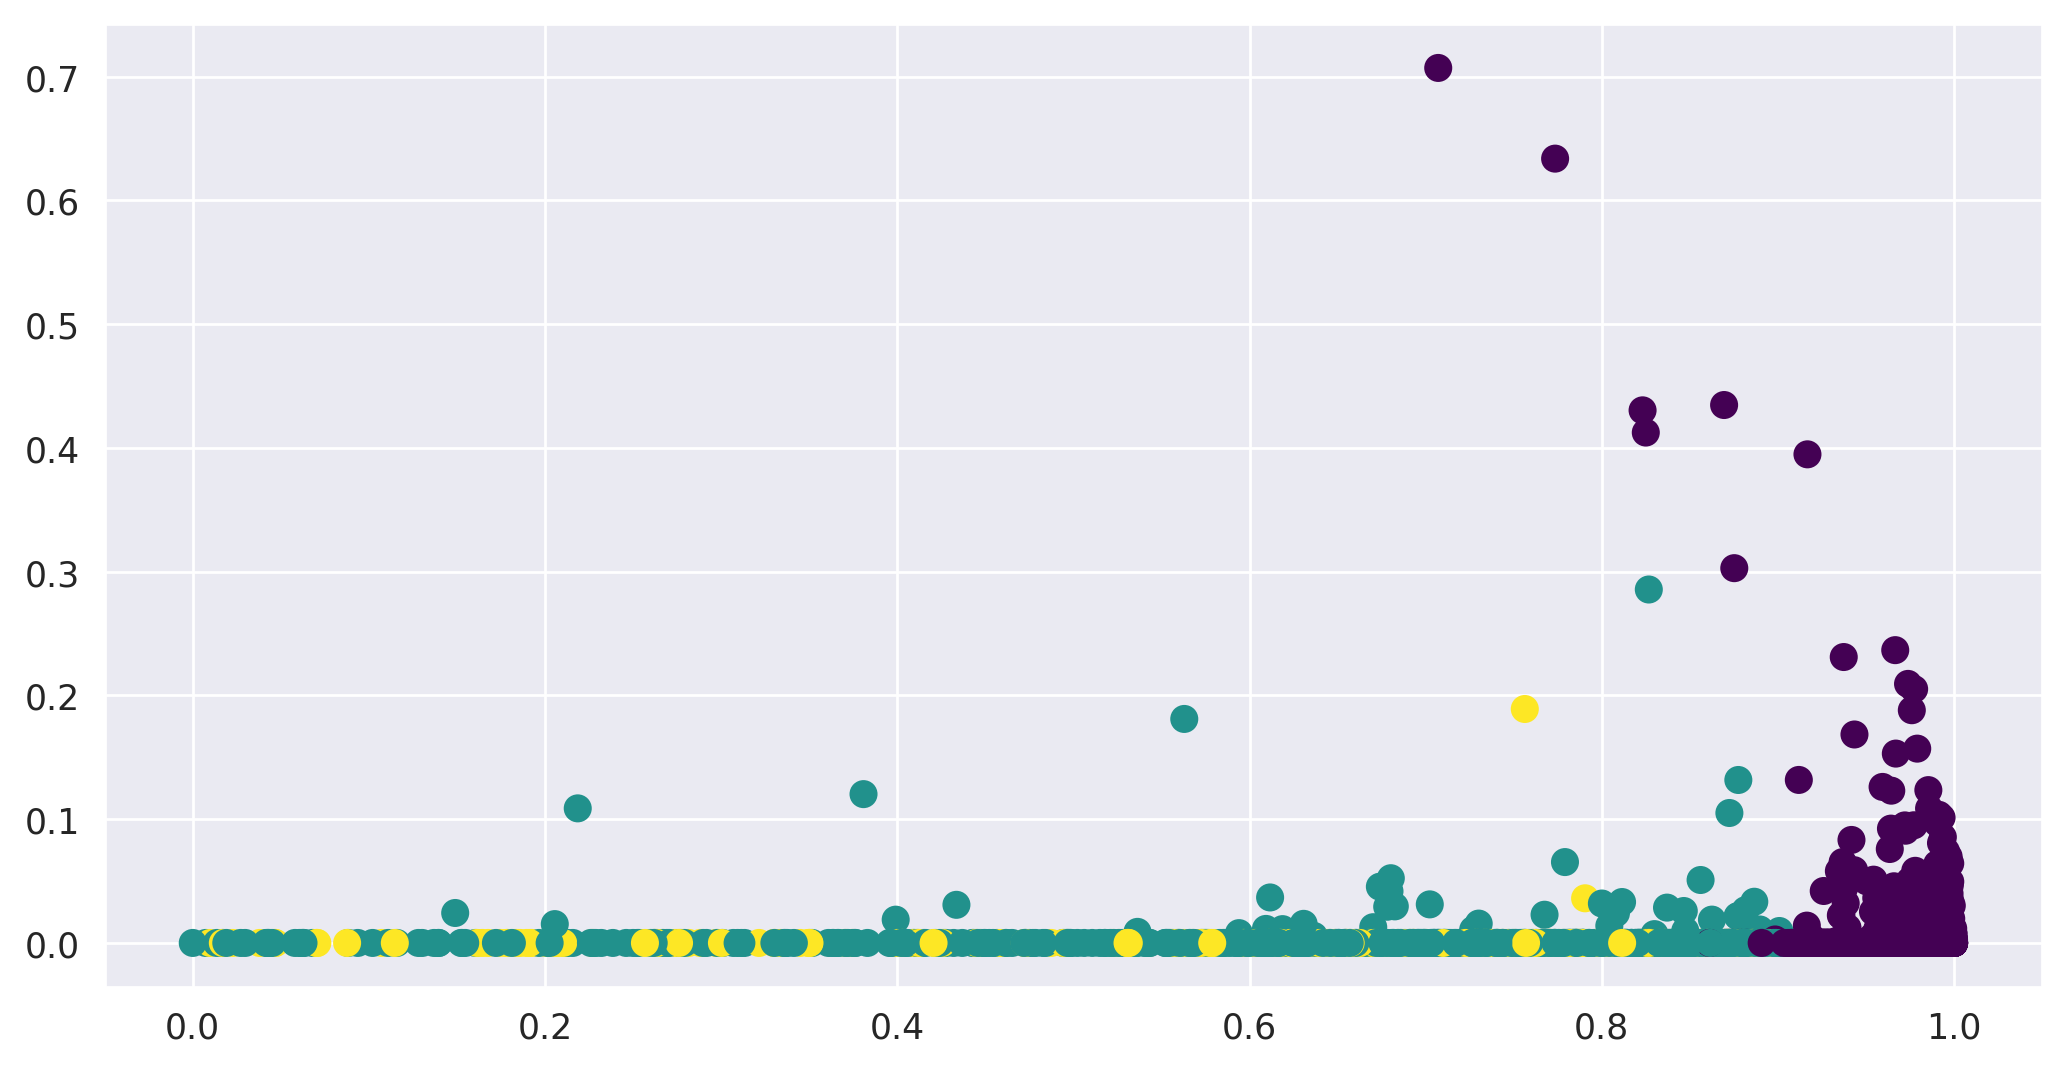

In [75]:
plt.scatter(X[:,0],X[:,1],c=k_means,s=50,cmap='viridis')

In [76]:
#DBSCAN Clustering
db=DBSCAN(eps=1,min_samples=4)
y=db.fit_predict(airline2)

In [77]:
db.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [78]:
#Adding clusters to dataset
airline2['clusters']=db.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,k_cluster,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,4,1,-1
1,19244,0,1,1,1,215,2,0,0,6968,0,2,1,-1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,1,-1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,1,-1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,1,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,1,-1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,1,-1


In [79]:
airline2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,k_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,73601.327582,144.114529,2.059515,1.014504,1.012253,17144.846212,11.6019,460.055764,1.373593,4118.55939,0.370343,2.512628,1.326832


In [80]:
from sklearn.metrics import silhouette_score

In [81]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>